In [1]:
# Load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

In [2]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving flu.csv to flu.csv


In [4]:
# Baca CSV
df = pd.read_csv('flu.csv')
print("\n 5 Data Teratas:")
print(df.head())

# Cek jumlah nilai unik per kolom
print("\n Jumlah nilai unik setiap kolom:")
print(df.nunique())

# Pilih kandidat target klasifikasi
possible_targets = [
    col for col in df.columns
    if df[col].nunique() <= 10 and df[col].dtype in ['object', 'int64', 'bool']
]
print("\n Kolom kandidat target klasifikasi:", possible_targets)



 5 Data Teratas:
  Diagnosis InitialPCRDiagnosis   Age Sex  neutrophil  \
0      H1N1                 NaN  67.0   F         NaN   
1      H1N1                 NaN  29.0   M         NaN   
2      H1N1                 NaN  22.0   F         NaN   
3      H1N1                 NaN  20.0   F         NaN   
4      H1N1                 NaN  21.0   M         NaN   

   serumLevelsOfWhiteBloodCell  lymphocytes CReactiveProteinLevels  \
0                          NaN          NaN                    NaN   
1                          NaN          NaN                    NaN   
2                          NaN          NaN                    NaN   
3                          NaN          NaN                    NaN   
4                          NaN          NaN                    NaN   

   DurationOfIllness CTscanResults RiskFactors GroundGlassOpacity Diarrhea  \
0                NaN           NaN         NaN                NaN      NaN   
1                NaN           NaN         NaN                


===== Target saat ini: Diagnosis =====

 Evaluasi Model:
Akurasi : 0.9494949494949495
Presisi : 0.9528301886792453
Recall  : 0.9758454106280193
F1 Score: 0.964200477326969
AUC     : 0.9567632850241546


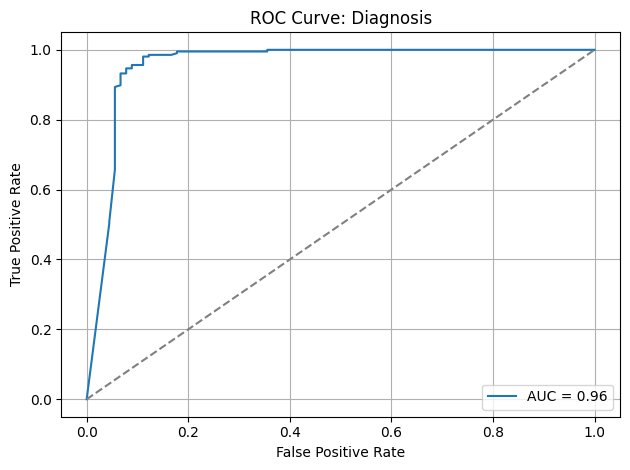


===== Target saat ini: InitialPCRDiagnosis =====

 Evaluasi Model:
Akurasi : 1.0
Presisi : 1.0
Recall  : 1.0
F1 Score: 1.0
AUC     : nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


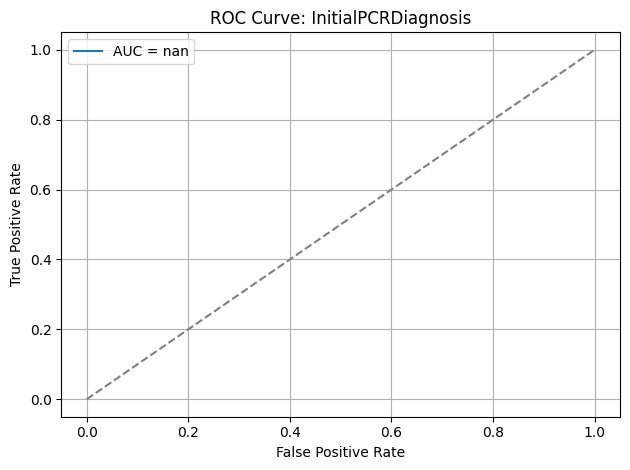


===== Target saat ini: Sex =====

 Evaluasi Model:
Akurasi : 0.48936170212765956
Presisi : 0.5394736842105263
Recall  : 0.5256410256410257
F1 Score: 0.5324675324675324
AUC     : 0.5227920227920229


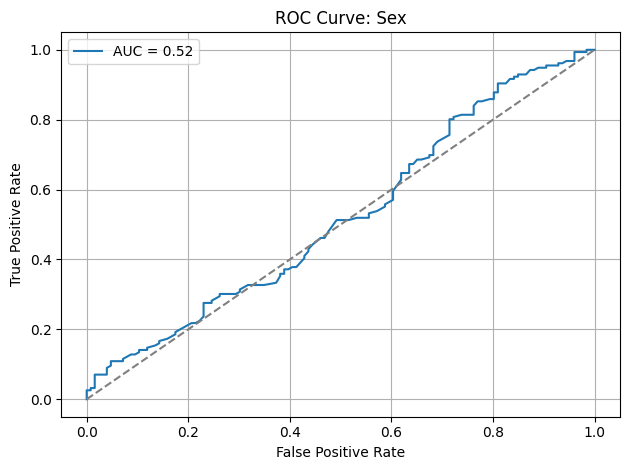


===== Target saat ini: CTscanResults =====

 Evaluasi Model:
Akurasi : 0.9375
Presisi : 0.9375
Recall  : 1.0
F1 Score: 0.967741935483871
AUC     : 0.9083333333333333


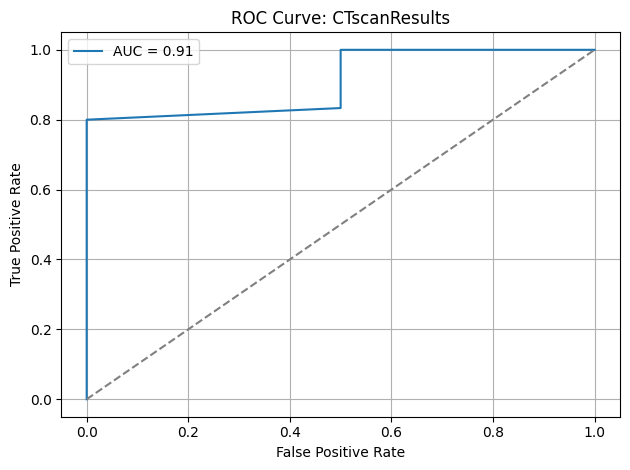


===== Target saat ini: GroundGlassOpacity =====

 Evaluasi Model:
Akurasi : 0.9473684210526315
Presisi : 0.9473684210526315
Recall  : 1.0
F1 Score: 0.972972972972973
AUC     : 1.0


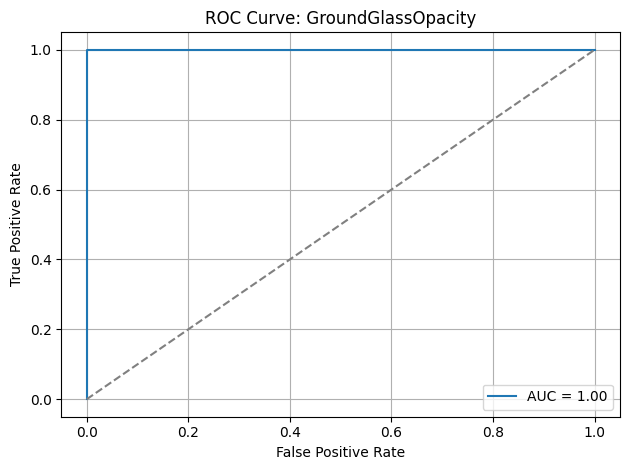


===== Target saat ini: Diarrhea =====

 Evaluasi Model:
Akurasi : 0.8333333333333334
Presisi : 0.6
Recall  : 0.5
F1 Score: 0.5454545454545454
AUC     : 0.777391975308642


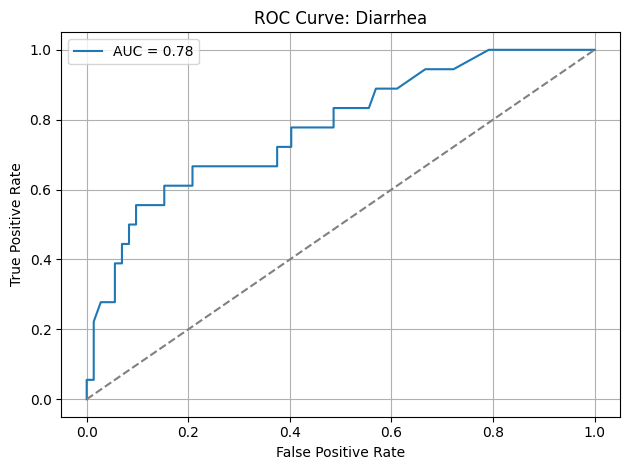


===== Target saat ini: Fever =====

 Evaluasi Model:
Akurasi : 0.8
Presisi : 0.8554216867469879
Recall  : 0.9161290322580645
F1 Score: 0.8847352024922118
AUC     : 0.7708602150537635


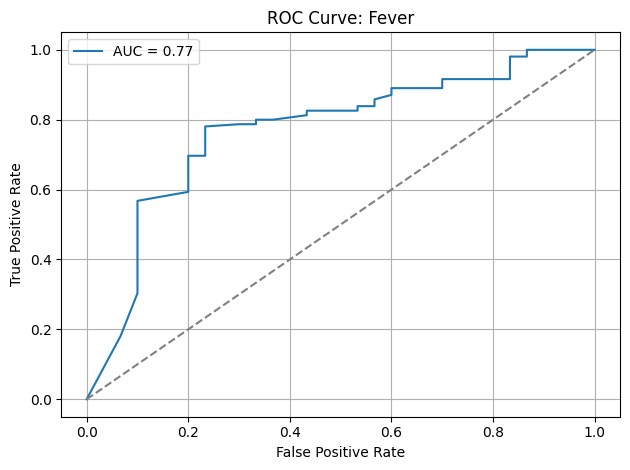


===== Target saat ini: Coughing =====

 Evaluasi Model:
Akurasi : 0.9244186046511628
Presisi : 0.9371069182389937
Recall  : 0.9802631578947368
F1 Score: 0.9581993569131833
AUC     : 0.8769736842105263


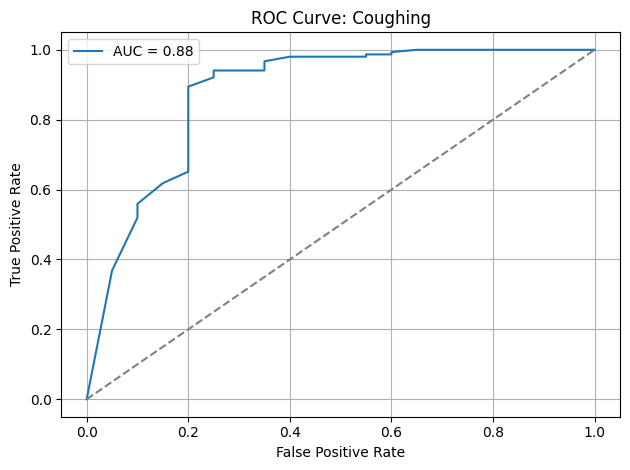


===== Target saat ini: ShortnessOfBreath =====

 Evaluasi Model:
Akurasi : 0.8
Presisi : 0.75
Recall  : 1.0
F1 Score: 0.8571428571428571
AUC     : 0.925925925925926


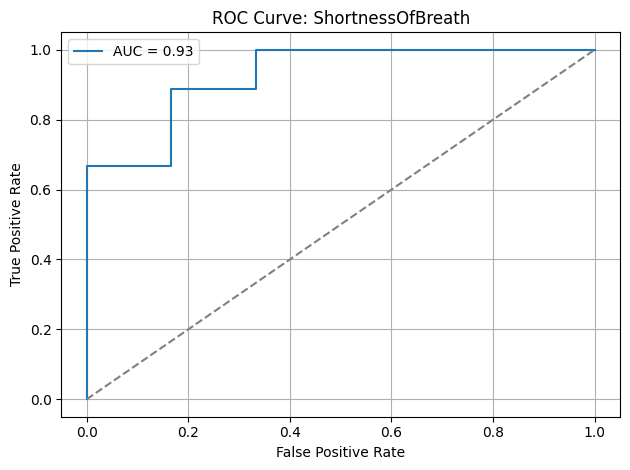


===== Target saat ini: SoreThroat =====

 Evaluasi Model:
Akurasi : 0.6492537313432836
Presisi : 0.6296296296296297
Recall  : 0.75
F1 Score: 0.6845637583892618
AUC     : 0.6902852049910874


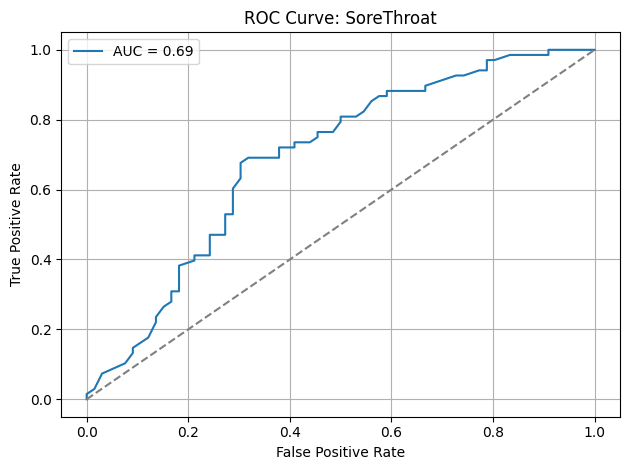


===== Target saat ini: NauseaVomitting =====

 Evaluasi Model:
Akurasi : 0.7176470588235294
Presisi : 0.4
Recall  : 0.08695652173913043
F1 Score: 0.14285714285714285
AUC     : 0.5753856942496494


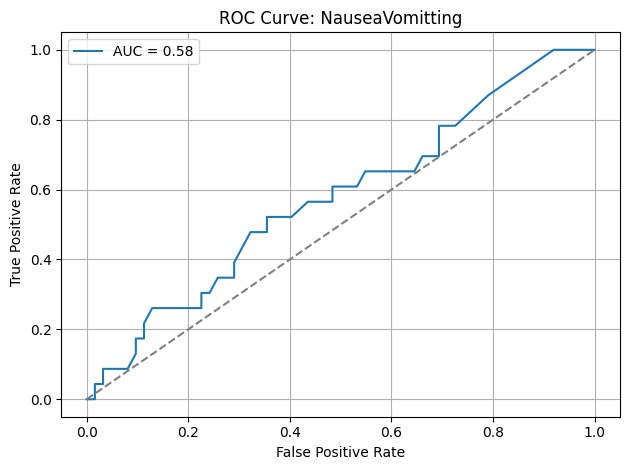


===== Target saat ini: Fatigue =====

 Evaluasi Model:
Akurasi : 0.8317757009345794
Presisi : 0.8513513513513513
Recall  : 0.9
F1 Score: 0.875
AUC     : 0.8814671814671815


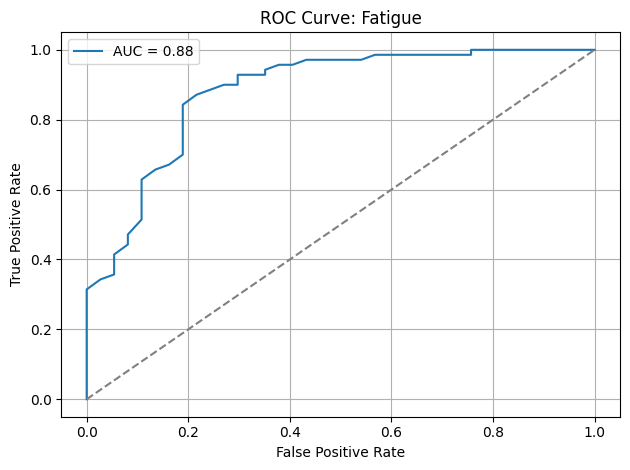

In [5]:
# Loop untuk setiap target kandidat
for target_col in possible_targets:
    print(f"\n===== Target saat ini: {target_col} =====")

    # Drop baris NaN di target
    df_target = df.dropna(subset=[target_col])

    # Pisahkan fitur dan target
    X = df_target.drop(columns=[target_col])
    y = df_target[target_col]

    # One-hot encoding fitur kategorikal
    X = pd.get_dummies(X)

    # Encode target jika bertipe object
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)

    # Skip jika target bukan biner
    if len(np.unique(y)) != 2:
        print(" Target bukan biner. Lewati evaluasi AUC/ROC.")
        continue

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Prediksi
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Evaluasi
    print("\n Evaluasi Model:")
    print("Akurasi :", accuracy_score(y_test, y_pred))
    print("Presisi :", precision_score(y_test, y_pred))
    print("Recall  :", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC     :", roc_auc_score(y_test, y_prob))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {target_col}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



# 📈 **Penjelasan Metrik Evaluasi Model Klasifikasi**

Model klasifikasi (seperti Random Forest) dievaluasi menggunakan berbagai metrik. Berikut adalah rumus dan penjelasannya:

## 1.  **Akurasi (Accuracy)**

Mengukur proporsi prediksi yang benar dari seluruh jumlah data.

$$
\text{Akurasi} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **TP**: True Positive → Kelas positif yang diprediksi benar  
- **TN**: True Negative → Kelas negatif yang diprediksi benar  
- **FP**: False Positive → Kelas negatif yang diprediksi sebagai positif  
- **FN**: False Negative → Kelas positif yang diprediksi sebagai negatif  

**Interpretasi**: Semakin tinggi akurasi, semakin baik model dalam mengklasifikasikan dengan benar.

---

## 2.  **Presisi (Precision)**

Menunjukkan seberapa tepat model dalam memprediksi kelas positif.

$$
\text{Presisi} = \frac{TP}{TP + FP}
$$

**Interpretasi**: Dari semua prediksi positif, berapa banyak yang benar-benar positif. Cocok untuk kasus di mana *false positive* harus diminimalkan.

---

## 3.  **Recall (Sensitivity / True Positive Rate)**

Menunjukkan seberapa baik model menangkap kelas positif yang sebenarnya.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Interpretasi**: Dari semua data yang sebenarnya positif, berapa banyak yang berhasil diprediksi positif. Cocok untuk kasus di mana *false negative* harus diminimalkan (misalnya: diagnosis penyakit).

---

## 4.  **F1 Score**

Menggabungkan presisi dan recall menjadi satu skor harmonik rata-rata.

$$
\text{F1 Score} = 2 \times \frac{\text{Presisi} \times \text{Recall}}{\text{Presisi} + \text{Recall}}
$$

**Interpretasi**: Cocok untuk dataset tidak seimbang, karena F1 memberikan keseimbangan antara presisi dan recall.

---

## 5.  **AUC (Area Under Curve)**

AUC mengukur kemampuan model untuk membedakan antara kelas.

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(x) \, dx
$$

- Diukur dari kurva **ROC (Receiver Operating Characteristic)**, yang memplot **TPR** terhadap **FPR**.
- Nilai AUC antara 0 dan 1, di mana 1 adalah terbaik dan 0.5 berarti tebak-tebakan.

---

## 6.  **ROC Curve (Receiver Operating Characteristic)**

Plot antara:

- **TPR (Recall)** di sumbu Y  
- **FPR (False Positive Rate)** di sumbu X

### Rumus TPR dan FPR:

$$
\text{TPR} = \frac{TP}{TP + FN} \quad \text{(sama dengan Recall)}
$$

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

**Interpretasi** : ROC Curve menunjukkan trade-off antara sensitivitas dan spesifisitas. Semakin dekat kurva ke kiri atas, semakin baik performa model.